<a href="https://colab.research.google.com/github/hkrsmk/beepboop-shopee-code-league-2020/blob/master/7_MarketingAnalytics/marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# bring data in

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/student-shopee-code-league-marketing-analytics/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/student-shopee-code-league-marketing-analytics/test.csv')
df_user = pd.read_csv('/content/drive/My Drive/student-shopee-code-league-marketing-analytics/users.csv')

In [ ]:
df_test.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4


# Cleaning the data for train.csv

In [ ]:
# To check whether there is any missing values and the data types of the column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

Since there is no missing values, there is no need to use any of the following methods to tackle the missing values:

1.   Numerical Imputation (fillna with 0 or median)
2.   Drop the columns and rows with number of missing values above certain threshold
3. Categorical Imputation (fillna with maximum occurred value or Others)





In [ ]:
#create a new data frame for feature engineering 

#Apply one-hot encoding for the country code column
df = df_train[['country_code']].copy()
encoded_columns = pd.get_dummies(df['country_code'])
df = df.join(encoded_columns).drop('country_code', axis=1)

#Extract info on the weekday date and month that the grass date is on
df['weekday_date'] = pd.to_datetime(df_train.grass_date).dt.day_name()
df['month'] = pd.to_datetime(df_train.grass_date).dt.month

#Include the subject line length
df['subject_line_length']=df_train['subject_line_length'].copy()

# To convert the last open day into integer type and for last open day, it is set as 0
df['opened'] = df_train.last_open_day.fillna('NA').apply(lambda x: 0 if x =='Never open' else 1)
df['last_open_day'] = df_train.last_open_day.apply(lambda x: 1000 if x =='Never open' else x)
df['last_open_day']=df['last_open_day'].astype(str).astype(int)

# To convert the last login day into integer type 
df['logined'] = df_train.last_login_day.fillna('NA').apply(lambda x: 0 if x =='Never login' else 1)
df['last_login_day'] = df_train.last_login_day.apply(lambda x: 20000 if x =='Never login' else x)
df['last_login_day'] = df['last_login_day'].astype(str).astype(int)

# To convert the last checkout day into integer type 
df['checkouted'] = df_train.last_checkout_day.fillna('NA').apply(lambda x: 0 if x =='Never checkout' else 1)
df['last_checkout_day'] = df_train.last_checkout_day.apply(lambda x: 1500 if x =='Never checkout' else x)
df['last_checkout_day'] = df['last_checkout_day'].astype(str).astype(int)

df.head(5)

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day
0,0,0,0,1,0,0,0,Tuesday,7,44,1,19,1,6,1,18
1,0,0,0,1,0,0,0,Tuesday,7,44,1,9,1,4,1,8
2,0,0,0,0,0,1,0,Tuesday,7,49,1,14,1,5,1,5
3,1,0,0,0,0,0,0,Tuesday,7,49,1,49,1,9,1,53
4,0,0,0,0,0,1,0,Tuesday,7,49,1,227,1,6,1,221


In [ ]:
#remove noise in open count last 10/30/60 days

#set those that are last open more than 10 days ago as 0 under open_count_last_10_days
df['open_count_last_10_days'] = df_train['open_count_last_10_days'].copy()
df['open_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 10) else x['open_count_last_10_days'],axis =1)

df['open_count_last_30_days'] = df_train['open_count_last_30_days'].copy()
df['open_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 30) else x['open_count_last_30_days'],axis =1)
df['open_count_last_60_days'] = df_train['open_count_last_60_days'].copy()
df['open_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 60) else x['open_count_last_60_days'],axis =1)


df.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,0,0,0,1,0,0,0,Tuesday,7,44,1,19,1,6,1,18,0,2,4
1,0,0,0,1,0,0,0,Tuesday,7,44,1,9,1,4,1,8,2,9,17
2,0,0,0,0,0,1,0,Tuesday,7,49,1,14,1,5,1,5,0,4,12
3,1,0,0,0,0,0,0,Tuesday,7,49,1,49,1,9,1,53,0,0,1
4,0,0,0,0,0,1,0,Tuesday,7,49,1,227,1,6,1,221,0,0,0


In [ ]:
df['open_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 10) & (x['open_count_last_10_days']==0)) else x['open_count_last_10_days'],axis=1)
df['open_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 30) & (x['open_count_last_30_days']==0)) else x['open_count_last_30_days'],axis =1)
df['open_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 60) & (x['open_count_last_60_days']==0)) else x['open_count_last_60_days'],axis =1)
df.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,0,0,0,1,0,0,0,Tuesday,7,44,1,19,1,6,1,18,0,2,4
1,0,0,0,1,0,0,0,Tuesday,7,44,1,9,1,4,1,8,2,9,17
2,0,0,0,0,0,1,0,Tuesday,7,49,1,14,1,5,1,5,0,4,12
3,1,0,0,0,0,0,0,Tuesday,7,49,1,49,1,9,1,53,0,0,1
4,0,0,0,0,0,1,0,Tuesday,7,49,1,227,1,6,1,221,0,0,0


In [ ]:
#remove noise in open login last 10/30/60 days

#set those that are last login more than 10 days ago as 0 under open_count_last_10_days
df['login_count_last_10_days'] = df_train['login_count_last_10_days'].copy()
df['login_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 10) else x['login_count_last_10_days'],axis =1)
df['login_count_last_30_days'] = df_train['login_count_last_30_days'].copy()
df['login_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 30) else x['login_count_last_30_days'],axis =1)
df['login_count_last_60_days'] = df_train['login_count_last_60_days'].copy()
df['login_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 60) else x['login_count_last_60_days'],axis =1)

df['login_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 10) & (x['login_count_last_10_days']==0)) else x['login_count_last_10_days'],axis=1)
df['login_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 30) & (x['login_count_last_30_days']==0)) else x['login_count_last_30_days'],axis =1)
df['login_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 60) & (x['login_count_last_60_days']==0)) else x['login_count_last_60_days'],axis =1)

df.head()


,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days
0,0,0,0,1,0,0,0,Tuesday,7,44,1,19,1,6,1,18,0,2,4,12,43,99
1,0,0,0,1,0,0,0,Tuesday,7,44,1,9,1,4,1,8,2,9,17,18,48,90
2,0,0,0,0,0,1,0,Tuesday,7,49,1,14,1,5,1,5,0,4,12,24,69,119
3,1,0,0,0,0,0,0,Tuesday,7,49,1,49,1,9,1,53,0,0,1,9,23,69
4,0,0,0,0,0,1,0,Tuesday,7,49,1,227,1,6,1,221,0,0,0,2,5,5


In [ ]:
df['checkout_count_last_10_days'] = df_train['checkout_count_last_10_days'].copy()
df['checkout_count_last_30_days'] = df_train['checkout_count_last_30_days'].copy()
df['checkout_count_last_60_days'] = df_train['checkout_count_last_60_days'].copy()

In [ ]:
# remove noise in open checkout last 10/30/60 days

# set those that are last checkout more than 10 days ago as 0 under open_count_last_10_days
df['checkout_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 10) else x['checkout_count_last_10_days'],axis =1)
df['checkout_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 30) else x['checkout_count_last_30_days'],axis =1)
df['checkout_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 60) else x['checkout_count_last_60_days'],axis =1)

df['checkout_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 10) & (x['checkout_count_last_10_days']==0)) else x['checkout_count_last_10_days'],axis=1)
df['checkout_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 30) & (x['checkout_count_last_30_days']==0)) else x['checkout_count_last_30_days'],axis =1)
df['checkout_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 60) & (x['checkout_count_last_60_days']==0)) else x['checkout_count_last_60_days'],axis =1)

df.head()



,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
0,0,0,0,1,0,0,0,Tuesday,7,44,1,19,1,6,1,18,0,2,4,12,43,99,0,5,10
1,0,0,0,1,0,0,0,Tuesday,7,44,1,9,1,4,1,8,2,9,17,18,48,90,1,1,4
2,0,0,0,0,0,1,0,Tuesday,7,49,1,14,1,5,1,5,0,4,12,24,69,119,5,19,27
3,1,0,0,0,0,0,0,Tuesday,7,49,1,49,1,9,1,53,0,0,1,9,23,69,0,0,6
4,0,0,0,0,0,1,0,Tuesday,7,49,1,227,1,6,1,221,0,0,0,2,5,5,0,0,0


In [ ]:
#convert last open/checkout/login day into frequency
df['frequency_open_last_10_days']=df['open_count_last_10_days']/10
df['frequency_open_last_10-30_days']=(df['open_count_last_30_days']-df['open_count_last_10_days'])/20
df['frequency_open_last_30-60_days']=(df['open_count_last_60_days']-df['open_count_last_30_days'])/30
df['frequency_login_last_10_days']=df['open_count_last_10_days']/10
df['frequency_login_last_10-30_days']=(df['open_count_last_30_days']-df['open_count_last_10_days'])/20
df['frequency_login_last_30-60_days']=(df['open_count_last_60_days']-df['open_count_last_30_days'])/30
df['frequency_checkout_last_10_days']=df['open_count_last_10_days']/10
df['frequency_checkout_last_10-30_days']=(df['open_count_last_30_days']-df['open_count_last_10_days'])/20
df['frequency_checkout_last_30-60_days']=(df['open_count_last_60_days']-df['open_count_last_30_days'])/30
df

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days
0,0,0,0,1,0,0,0,Tuesday,7,44,1,19,1,6,1,18,0,2,4,12,43,99,0,5,10,0.0,0.10,0.066667,0.0,0.10,0.066667,0.0,0.10,0.066667
1,0,0,0,1,0,0,0,Tuesday,7,44,1,9,1,4,1,8,2,9,17,18,48,90,1,1,4,0.2,0.35,0.266667,0.2,0.35,0.266667,0.2,0.35,0.266667
2,0,0,0,0,0,1,0,Tuesday,7,49,1,14,1,5,1,5,0,4,12,24,69,119,5,19,27,0.0,0.20,0.266667,0.0,0.20,0.266667,0.0,0.20,0.266667
3,1,0,0,0,0,0,0,Tuesday,7,49,1,49,1,9,1,53,0,0,1,9,23,69,0,0,6,0.0,0.00,0.033333,0.0,0.00,0.033333,0.0,0.00,0.033333
4,0,0,0,0,0,1,0,Tuesday,7,49,1,227,1,6,1,221,0,0,0,2,5,5,0,0,0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,0,0,0,0,0,1,0,Monday,9,39,1,24,1,36,1,279,0,1,1,0,0,1,0,0,0,0.0,0.05,0.000000,0.0,0.05,0.000000,0.0,0.05,0.000000
73535,0,1,0,0,0,0,0,Monday,9,38,1,46,1,10,1,51,0,0,1,1,1,1,0,0,1,0.0,0.00,0.033333,0.0,0.00,0.033333,0.0,0.00,0.033333
73536,0,1,0,0,0,0,0,Monday,9,32,0,1000,0,20000,0,1500,0,0,0,0,0,0,0,0,0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.00,0.000000
73537,0,1,0,0,0,0,0,Monday,9,38,1,5,1,34,0,1500,2,4,4,0,0,1,0,0,0,0.2,0.10,0.000000,0.2,0.10,0.000000,0.2,0.10,0.000000


# Cleaning the data for User and merge with the Training dataframe



In [ ]:
df_user.head(10)

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
5,5,1.0,1.0,1.0,30.0,@gmail.com
6,6,1.0,1.0,2.0,32.0,@gmail.com
7,7,1.0,1.0,1.0,36.0,@gmail.com
8,8,1.0,1.0,1.0,43.0,@yahoo.com
9,9,NaN,1.0,0.0,NaN,@gmail.com


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [ ]:
df_user.isna().sum()

user_id        0
attr_1     48899
attr_2       447
attr_3         0
age        48899
domain         0
dtype: int64

In [ ]:
df['user_id']= df_train['user_id'].copy()
df['open_flag']=df_train['open_flag'].copy()
df_train_1 = pd.merge(left=df, right=df_user, left_on='user_id', right_on='user_id')
data = pd.merge(left=df, right=df_user, left_on='user_id', right_on='user_id')

# Apply one-hot encoding for the domain column
encoded_columns = pd.get_dummies(df_train_1['domain'])
df_train_1 = df_train_1.join(encoded_columns).drop('domain', axis=1)

#-1 assigned for missing data
df_train_1['attr_1']= df_train_1['attr_1'].fillna(-1)
df_train_1['attr_2']= df_train_1['attr_2'].fillna(-1)

# Apply one-hot encoding for the weekday date column
encoded_columns = pd.get_dummies(df_train_1['weekday_date'])
df_train_1 = df_train_1.join(encoded_columns).drop('weekday_date', axis=1)
df_train_1

,1,2,3,4,5,6,7,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,user_id,open_flag,attr_1,attr_2,attr_3,age,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0,7,44,1,19,1,6,1,18,0,2,4,12,43,99,0,5,10,0.0,0.10,0.066667,0.0,0.10,0.066667,0.0,0.10,0.066667,43,0,1.0,1.0,2.0,47.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,7,44,1,9,1,4,1,8,2,9,17,18,48,90,1,1,4,0.2,0.35,0.266667,0.2,0.35,0.266667,0.2,0.35,0.266667,102,1,1.0,1.0,2.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,7,49,1,14,1,5,1,5,0,4,12,24,69,119,5,19,27,0.0,0.20,0.266667,0.0,0.20,0.266667,0.0,0.20,0.266667,177,0,-1.0,1.0,0.0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,7,49,1,49,1,9,1,53,0,0,1,9,23,69,0,0,6,0.0,0.00,0.033333,0.0,0.00,0.033333,0.0,0.00,0.033333,184,0,1.0,1.0,2.0,24.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,7,49,1,227,1,6,1,221,0,0,0,2,5,5,0,0,0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.00,0.000000,221,0,-1.0,1.0,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,0,0,0,0,0,1,0,9,39,1,24,1,36,1,279,0,1,1,0,0,1,0,0,0,0.0,0.05,0.000000,0.0,0.05,0.000000,0.0,0.05,0.000000,127613,0,-1.0,1.0,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
73535,0,1,0,0,0,0,0,9,38,1,46,1,10,1,51,0,0,1,1,1,1,0,0,1,0.0,0.00,0.033333,0.0,0.00,0.033333,0.0,0.00,0.033333,127620,0,1.0,1.0,2.0,30.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
73536,0,1,0,0,0,0,0,9,32,0,1000,0,20000,0,1500,0,0,0,0,0,0,0,0,0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.00,0.000000,127696,0,-1.0,-1.0,0.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
73537,0,1,0,0,0,0,0,9,38,1,5,1,34,0,1500,2,4,4,0,0,1,0,0,0,0.2,0.10,0.000000,0.2,0.10,0.000000,0.2,0.10,0.000000,127807,1,1.0,1.0,1.0,38.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_1 = df_train_1.drop(['age', 'open_count_last_10_days', 'open_count_last_30_days', 'open_count_last_60_days',
               'login_count_last_10_days', 'login_count_last_30_days', 'login_count_last_60_days',
               'checkout_count_last_10_days', 'checkout_count_last_30_days', 'checkout_count_last_60_days','user_id'],
               axis = 1,
               inplace = False)

df_2 = df_train_1.drop(['age', 'frequency_open_last_10_days', 'frequency_open_last_10-30_days', 'frequency_open_last_30-60_days',
               'frequency_login_last_10_days', 'frequency_login_last_10-30_days', 'frequency_login_last_30-60_days',
               'frequency_checkout_last_10_days', 'frequency_checkout_last_10-30_days', 'frequency_checkout_last_30-60_days','user_id'],
               axis = 1,
               inplace = False)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   1                                   73539 non-null  uint8  
 1   2                                   73539 non-null  uint8  
 2   3                                   73539 non-null  uint8  
 3   4                                   73539 non-null  uint8  
 4   5                                   73539 non-null  uint8  
 5   6                                   73539 non-null  uint8  
 6   7                                   73539 non-null  uint8  
 7   month                               73539 non-null  int64  
 8   subject_line_length                 73539 non-null  int64  
 9   opened                              73539 non-null  int64  
 10  last_open_day                       73539 non-null  int64  
 11  logined                             73539

In [ ]:
df_1.head()

,1,2,3,4,5,6,7,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,open_flag,attr_1,attr_2,attr_3,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0,7,44,1,19,1,6,1,18,0.0,0.10,0.066667,0.0,0.10,0.066667,0.0,0.10,0.066667,0,1.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,7,44,1,9,1,4,1,8,0.2,0.35,0.266667,0.2,0.35,0.266667,0.2,0.35,0.266667,1,1.0,1.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,7,49,1,14,1,5,1,5,0.0,0.20,0.266667,0.0,0.20,0.266667,0.0,0.20,0.266667,0,-1.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,7,49,1,49,1,9,1,53,0.0,0.00,0.033333,0.0,0.00,0.033333,0.0,0.00,0.033333,0,1.0,1.0,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,7,49,1,227,1,6,1,221,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.00,0.000000,0,-1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Jieru original

Follows https://towardsdatascience.com/end-to-end-python-framework-for-predictive-modeling-b8052bb96a78

## Machine Learning

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


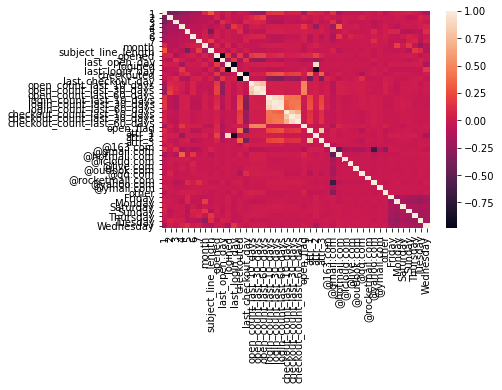

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df_2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
df_2.columns = df_2.columns.astype(str)
features = df_2[df_2.columns.difference(['open_flag'])]
labels = df_2['open_flag']

In [ ]:
# import packages
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 2

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
final_iv, IV = data_vars(df_2[df_2.columns.difference(['open_flag'])],df_2.open_flag)
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,1,0.0,0.0,45116,9151,0.202833,35965,0.797167,0.798795,0.579305,0.321276,0.232410
1,1,1.0,1.0,28423,2305,0.081096,26118,0.918904,0.201205,0.420695,-0.737585,0.232410
2,2,0.0,0.0,59665,8804,0.147557,50861,0.852443,0.768506,0.819242,-0.063932,0.015796
3,2,1.0,1.0,13874,2652,0.191149,11222,0.808851,0.231494,0.180758,0.247397,0.015796
4,3,0.0,0.0,59694,9637,0.161440,50057,0.838560,0.841219,0.806292,0.042406,0.008425
...,...,...,...,...,...,...,...,...,...,...,...,...
93,other,0.0,0.0,72340,11077,0.153124,61263,0.846876,0.966917,0.986792,-0.020347,0.018653
94,other,1.0,1.0,1199,379,0.316097,820,0.683903,0.033083,0.013208,0.918190,0.018653
95,subject_line_length,10.0,38.0,27403,4870,0.177718,22533,0.822282,0.425105,0.362950,0.158072,0.031869
96,subject_line_length,39.0,49.0,22521,3668,0.162870,18853,0.837130,0.320182,0.303674,0.052933,0.031869


In [ ]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
41,open_count_last_60_days,1.212889
39,open_count_last_10_days,1.169867
40,open_count_last_30_days,1.020076
33,last_open_day,0.987532
0,1,0.232410
3,4,0.153108
42,opened,0.081510
8,@gmail.com,0.060959
9,@hotmail.com,0.041255
44,subject_line_length,0.031869


In [ ]:
transform_vars_list = df_2.columns.difference(['open_flag'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values
transform_vars_list

Index(['1', '2', '3', '4', '5', '6', '7', '@163.com', '@gmail.com',
       '@hotmail.com', '@icloud.com', '@live.com', '@outlook.com', '@qq.com',
       '@rocketmail.com', '@yahoo.com', '@ymail.com', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'attr_1',
       'attr_2', 'attr_3', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days',
       'checkouted', 'last_checkout_day', 'last_login_day', 'last_open_day',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'logined', 'month',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'opened', 'other', 'subject_line_length'],
      dtype='object')

In [ ]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df_2[transform_prefix + var] = df_2[var].apply(lambda x: eval(replace_cmd))
        except:
            df_2[transform_prefix + var] = df_2[var].apply(lambda x: eval(replace_cmd1))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

0.9998640177320878


In [ ]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [ ]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
41,open_count_last_60_days,0.117743
40,open_count_last_30_days,0.115450
39,open_count_last_10_days,0.107744
33,last_open_day,0.077206
32,last_login_day,0.065852
36,login_count_last_60_days,0.056674
31,last_checkout_day,0.056033
44,subject_line_length,0.055119
35,login_count_last_30_days,0.048442
34,login_count_last_10_days,0.036267


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', dual = False, max_iter=3000)
rfe = RFE(model, 100)
fit = rfe.fit(features, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [ ]:
Selected[Selected['RFE'] == True]

,index,RFE
0,1,True
1,2,True
2,3,True
3,4,True
4,5,True
5,6,True
6,7,True
7,@163.com,True
8,@gmail.com,True
9,@hotmail.com,True


## Variable Importance using Extratrees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

FI = FI.reset_index()

[0.01500184 0.00627279 0.00618737 0.01933822 0.00589725 0.00314192
 0.00366694 0.00039509 0.00779533 0.00397052 0.00146413 0.00089721
 0.00077526 0.00123629 0.00023288 0.00383557 0.00070367 0.00722629
 0.00811257 0.00453583 0.00645749 0.00756515 0.00768258 0.00659109
 0.01182769 0.0007868  0.02577731 0.02111402 0.0287322  0.03350133
 0.00609509 0.04658701 0.06276393 0.06900953 0.03917749 0.04611577
 0.04937146 0.00024132 0.02114539 0.11213296 0.13430471 0.10959755
 0.00311955 0.0029246  0.04669098]


In [ ]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
40,open_count_last_30_days,0.134305
39,open_count_last_10_days,0.112133
41,open_count_last_60_days,0.109598
33,last_open_day,0.069010
32,last_login_day,0.062764
36,login_count_last_60_days,0.049371
44,subject_line_length,0.046691
31,last_checkout_day,0.046587
35,login_count_last_30_days,0.046116
34,login_count_last_10_days,0.039177


## Chi Square

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

chi_sq = chi_sq.reset_index()

chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
33,last_open_day,669288.70
32,last_login_day,316139.59
41,open_count_last_60_days,204069.39
40,open_count_last_30_days,136865.58
39,open_count_last_10_days,56860.66
31,last_checkout_day,51605.29
3,4,1796.64
0,1,1205.50
44,subject_line_length,697.54
9,@hotmail.com,495.12


## L1 feature selection

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()

l1[l1['L1'] == True]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,index,L1
0,1,True
1,2,True
2,3,True
3,4,True
5,6,True
8,@gmail.com,True
17,Friday,True
19,Saturday,True
20,Sunday,True
21,Thursday,True


## Combine All Together

In [ ]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [ ]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

score_table['final_score'] = score_table.sum(axis=1)

score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
41,open_count_last_60_days,1,1,1,1,1,1,6
40,open_count_last_30_days,1,1,1,1,1,1,6
39,open_count_last_10_days,1,1,1,1,1,1,6
33,last_open_day,1,1,1,1,1,1,6
32,last_login_day,0,1,1,1,1,0,4
0,1,1,0,0,0,1,1,3
23,Wednesday,0,0,0,0,1,1,2
24,attr_1,0,0,0,0,1,1,2
26,attr_3,0,0,0,0,1,1,2
28,checkout_count_last_30_days,0,0,0,0,1,1,2


## Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

features = features[list(score_table[score_table['final_score'] >= 2]['index'])]


vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)


list(vif['Features'])

['1',
 '2',
 '3',
 '4',
 '6',
 '@gmail.com',
 'Friday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'attr_1',
 'attr_3',
 'checkout_count_last_30_days',
 'checkout_count_last_60_days',
 'last_checkout_day',
 'last_login_day',
 'last_open_day',
 'login_count_last_10_days',
 'login_count_last_60_days',
 'open_count_last_10_days',
 'open_count_last_60_days']

## Actual Prediction - Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

scale = RobustScaler()
df_2[df_2.columns] = scale.fit_transform(df_2[df_2.columns])

train, test = train_test_split(df_2, test_size = 0.4)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])]
label_train = train['open_flag']
features_test = test[list(vif['Features'])]
label_test = test['open_flag']

## Random Forest

In [ ]:
clf2 = RandomForestClassifier(class_weight='balanced')

clf2.fit(features_train,label_train)

pred_train = clf2.predict(features_train)
pred_test = clf2.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf2.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf2.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.9997280329986629 0.8810511286374763 0.9999799668333733 0.8418245674506605


In [ ]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,37229,6
1.00,6,6882


In [ ]:

pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,24117,731
1.00,2768,1800


## Logistic Forest

In [ ]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(solver='lbfgs',max_iter= 1000, class_weight='balanced')

clf1.fit(features_train,label_train)

pred_train = clf1.predict(features_train)
pred_test = clf1.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf1.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf1.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.8145185050880493 0.8125509926570574 0.8521559243197028 0.8466197290383677


In [ ]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,30978,6257
1.00,1927,4961


In [ ]:
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,20599,4249
1.00,1265,3303


## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.8902839788772295 0.8861503943432146 0.8743096706466307 0.8555843301352786


In [ ]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,36032,1203
1.00,3638,3250


In [ ]:
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,23924,924
1.00,2425,2143


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.8283661582394669 0.8278147946695675 0.8193023459469762 0.8173078613944762


In [ ]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,32396,4839
1.00,2734,4154


In [ ]:

pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,21541,3307
1.00,1758,2810


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.887609636697414 0.8840426978515094 0.8619448360360562 0.8545385629390265


In [ ]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,36109,1126
1.00,3833,3055


In [ ]:
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,23989,859
1.00,2552,2016


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(features_train, label_train)

print(rf_random.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   44.7s finished


{'n_estimators': 445, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_random.best_params_,class_weight='balanced')

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.9916143507921039 0.879385368506935 0.9990972208250732 0.8493035642697091


In [ ]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,36882,353
1.00,17,6871


In [ ]:
pd.crosstab(label_train,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0.00,1.00
ACTUAL,,
0.00,21956,2848
1.00,4082,530


# Prepare the data for test.csv

In [ ]:
# To check whether there is any missing values and the data types of the column
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 55970 non-null  int64 
 1   grass_date                   55970 non-null  object
 2   user_id                      55970 non-null  int64 
 3   subject_line_length          55970 non-null  int64 
 4   last_open_day                55970 non-null  object
 5   last_login_day               55970 non-null  object
 6   last_checkout_day            55970 non-null  object
 7   open_count_last_10_days      55970 non-null  int64 
 8   open_count_last_30_days      55970 non-null  int64 
 9   open_count_last_60_days      55970 non-null  int64 
 10  login_count_last_10_days     55970 non-null  int64 
 11  login_count_last_30_days     55970 non-null  int64 
 12  login_count_last_60_days     55970 non-null  int64 
 13  checkout_count_last_10_days  55

Since there is no missing values, there is no need to use any of the following methods to tackle the missing values:

1.   Numerical Imputation (fillna with 0 or median)
2.   Drop the columns and rows with number of missing values above certain threshold
3. Categorical Imputation (fillna with maximum occurred value or Others)





In [ ]:
#create a new data frame for feature engineering 

#Apply one-hot encoding for the country code column
dft = df_test[['country_code']].copy()
encoded_columns = pd.get_dummies(dft['country_code'])
dft = dft.join(encoded_columns).drop('country_code', axis=1)

#Extract info on the weekday date and month that the grass date is on
dft['weekday_date'] = pd.to_datetime(df_test.grass_date).dt.day_name()
dft['month'] = pd.to_datetime(df_test.grass_date).dt.month

#Include the subject line length
dft['subject_line_length']=df_test['subject_line_length'].copy()

# To convert the last open day into integer type and for last open day, it is set as 0
dft['opened'] = df_test.last_open_day.fillna('NA').apply(lambda x: 0 if x =='Never open' else 1)
dft['last_open_day'] = df_test.last_open_day.apply(lambda x: 1000 if x =='Never open' else x)
dft['last_open_day']=dft['last_open_day'].astype(str).astype(int)

# To convert the last login day into integer type 
dft['logined'] = df_test.last_login_day.fillna('NA').apply(lambda x: 0 if x =='Never login' else 1)
dft['last_login_day'] = df_test.last_login_day.apply(lambda x: 20000 if x =='Never login' else x)
dft['last_login_day'] = dft['last_login_day'].astype(str).astype(int)

# To convert the last checkout day into integer type 
dft['checkouted'] = df_test.last_checkout_day.fillna('NA').apply(lambda x: 0 if x =='Never checkout' else 1)
dft['last_checkout_day'] = df_test.last_checkout_day.apply(lambda x: 1500 if x =='Never checkout' else x)
dft['last_checkout_day'] = dft['last_checkout_day'].astype(str).astype(int)

#remove noise in open count last 10/30/60 days

#set those that are last open more than 10 days ago as 0 under open_count_last_10_days
dft['open_count_last_10_days'] = df_test['open_count_last_10_days'].copy()
dft['open_count_last_10_days'] = dft.apply(lambda x: 0 if (x['last_open_day'] > 10) else x['open_count_last_10_days'],axis =1)

dft['open_count_last_30_days'] = df_test['open_count_last_30_days'].copy()
dft['open_count_last_30_days'] = dft.apply(lambda x: 0 if (x['last_open_day'] > 30) else x['open_count_last_30_days'],axis =1)
dft['open_count_last_60_days'] = df_test['open_count_last_60_days'].copy()
dft['open_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 60) else x['open_count_last_60_days'],axis =1)

dft['open_count_last_10_days'] = dft.apply(lambda x: 1 if ((x['last_open_day'] <= 10) & (x['open_count_last_10_days']==0)) else x['open_count_last_10_days'],axis=1)
dft['open_count_last_30_days'] = dft.apply(lambda x: 1 if ((x['last_open_day'] <= 30) & (x['open_count_last_30_days']==0)) else x['open_count_last_30_days'],axis =1)
dft['open_count_last_60_days'] = dft.apply(lambda x: 1 if ((x['last_open_day'] <= 60) & (x['open_count_last_60_days']==0)) else x['open_count_last_60_days'],axis =1)

dft.head(5)

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,0,0,0,0,0,1,0,Tuesday,9,35,1,27,1,2,1,13,0,3,4
1,0,0,0,0,0,1,0,Tuesday,9,35,1,7,1,5,1,383,1,1,17
2,0,0,0,0,1,0,0,Tuesday,9,25,1,34,1,1,1,3,0,0,12
3,1,0,0,0,0,0,0,Tuesday,9,36,1,63,1,5,1,5,0,0,1
4,0,0,0,0,1,0,0,Tuesday,9,23,1,6,1,5,1,54,1,1,1


In [ ]:
#remove noise in open login last 10/30/60 days

#set those that are last login more than 10 days ago as 0 under open_count_last_10_days
dft['login_count_last_10_days'] = df_test['login_count_last_10_days'].copy()
dft['login_count_last_10_days'] = dft.apply(lambda x: 0 if (x['last_login_day'] > 10) else x['login_count_last_10_days'],axis =1)
dft['login_count_last_30_days'] = df_test['login_count_last_30_days'].copy()
dft['login_count_last_30_days'] = dft.apply(lambda x: 0 if (x['last_login_day'] > 30) else x['login_count_last_30_days'],axis =1)
dft['login_count_last_60_days'] = df_test['login_count_last_60_days'].copy()
dft['login_count_last_60_days'] = dft.apply(lambda x: 0 if (x['last_login_day'] > 60) else x['login_count_last_60_days'],axis =1)

dft['login_count_last_10_days'] = dft.apply(lambda x: 1 if ((x['last_login_day'] <= 10) & (x['login_count_last_10_days']==0)) else x['login_count_last_10_days'],axis=1)
dft['login_count_last_30_days'] = dft.apply(lambda x: 1 if ((x['last_login_day'] <= 30) & (x['login_count_last_30_days']==0)) else x['login_count_last_30_days'],axis =1)
dft['login_count_last_60_days'] = dft.apply(lambda x: 1 if ((x['last_login_day'] <= 60) & (x['login_count_last_60_days']==0)) else x['login_count_last_60_days'],axis =1)

dft.head()


,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days
0,0,0,0,0,0,1,0,Tuesday,9,35,1,27,1,2,1,13,0,3,4,10,34,134
1,0,0,0,0,0,1,0,Tuesday,9,35,1,7,1,5,1,383,1,1,17,5,5,5
2,0,0,0,0,1,0,0,Tuesday,9,25,1,34,1,1,1,3,0,0,12,13,19,38
3,1,0,0,0,0,0,0,Tuesday,9,36,1,63,1,5,1,5,0,0,1,43,110,173
4,0,0,0,0,1,0,0,Tuesday,9,23,1,6,1,5,1,54,1,1,1,4,12,39


In [ ]:
dft['checkout_count_last_10_days'] = df_test['checkout_count_last_10_days'].copy()
dft['checkout_count_last_30_days'] = df_test['checkout_count_last_30_days'].copy()
dft['checkout_count_last_60_days'] = df_test['checkout_count_last_60_days'].copy()

In [ ]:
# remove noise in open checkout last 10/30/60 days

# set those that are last checkout more than 10 days ago as 0 under open_count_last_10_days
dft['checkout_count_last_10_days'] = dft.apply(lambda x: 0 if (x['last_checkout_day'] > 10) else x['checkout_count_last_10_days'],axis =1)
dft['checkout_count_last_30_days'] = dft.apply(lambda x: 0 if (x['last_checkout_day'] > 30) else x['checkout_count_last_30_days'],axis =1)
dft['checkout_count_last_60_days'] = dft.apply(lambda x: 0 if (x['last_checkout_day'] > 60) else x['checkout_count_last_60_days'],axis =1)

dft['checkout_count_last_10_days'] = dft.apply(lambda x: 1 if ((x['last_checkout_day'] <= 10) & (x['checkout_count_last_10_days']==0)) else x['checkout_count_last_10_days'],axis=1)
dft['checkout_count_last_30_days'] = dft.apply(lambda x: 1 if ((x['last_checkout_day'] <= 30) & (x['checkout_count_last_30_days']==0)) else x['checkout_count_last_30_days'],axis =1)
dft['checkout_count_last_60_days'] = dft.apply(lambda x: 1 if ((x['last_checkout_day'] <= 60) & (x['checkout_count_last_60_days']==0)) else x['checkout_count_last_60_days'],axis =1)

dft.head()



,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
0,0,0,0,0,0,1,0,Tuesday,9,35,1,27,1,2,1,13,0,3,4,10,34,134,0,6,18
1,0,0,0,0,0,1,0,Tuesday,9,35,1,7,1,5,1,383,1,1,17,5,5,5,0,0,0
2,0,0,0,0,1,0,0,Tuesday,9,25,1,34,1,1,1,3,0,0,12,13,19,38,2,2,2
3,1,0,0,0,0,0,0,Tuesday,9,36,1,63,1,5,1,5,0,0,1,43,110,173,2,5,5
4,0,0,0,0,1,0,0,Tuesday,9,23,1,6,1,5,1,54,1,1,1,4,12,39,0,0,2


In [ ]:
#convert last open/checkout/login day into frequency
dft['frequency_open_last_10_days']=dft['open_count_last_10_days']/10
dft['frequency_open_last_10-30_days']=(dft['open_count_last_30_days']-dft['open_count_last_10_days'])/20
dft['frequency_open_last_30-60_days']=(dft['open_count_last_60_days']-dft['open_count_last_30_days'])/30
dft['frequency_login_last_10_days']=dft['open_count_last_10_days']/10
dft['frequency_login_last_10-30_days']=(dft['open_count_last_30_days']-dft['open_count_last_10_days'])/20
dft['frequency_login_last_30-60_days']=(dft['open_count_last_60_days']-dft['open_count_last_30_days'])/30
dft['frequency_checkout_last_10_days']=dft['open_count_last_10_days']/10
dft['frequency_checkout_last_10-30_days']=(dft['open_count_last_30_days']-dft['open_count_last_10_days'])/20
dft['frequency_checkout_last_30-60_days']=(dft['open_count_last_60_days']-dft['open_count_last_30_days'])/30
dft

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days
0,0,0,0,0,0,1,0,Tuesday,9,35,1,27,1,2,1,13,0,3,4,10,34,134,0,6,18,0.00,0.15,0.03,0.00,0.15,0.03,0.00,0.15,0.03
1,0,0,0,0,0,1,0,Tuesday,9,35,1,7,1,5,1,383,1,1,17,5,5,5,0,0,0,0.10,0.00,0.53,0.10,0.00,0.53,0.10,0.00,0.53
2,0,0,0,0,1,0,0,Tuesday,9,25,1,34,1,1,1,3,0,0,12,13,19,38,2,2,2,0.00,0.00,0.40,0.00,0.00,0.40,0.00,0.00,0.40
3,1,0,0,0,0,0,0,Tuesday,9,36,1,63,1,5,1,5,0,0,1,43,110,173,2,5,5,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03
4,0,0,0,0,1,0,0,Tuesday,9,23,1,6,1,5,1,54,1,1,1,4,12,39,0,0,2,0.10,0.00,0.00,0.10,0.00,0.00,0.10,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0,0,0,0,0,1,0,Sunday,9,53,0,1000,1,4,1,8,0,0,21,1,1,1,1,1,1,0.00,0.00,0.70,0.00,0.00,0.70,0.00,0.00,0.70
55966,0,0,0,0,0,1,0,Sunday,9,53,1,59,1,802,1,1207,0,0,1,0,0,0,0,0,0,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03
55967,0,0,0,0,0,1,0,Sunday,9,43,0,1000,1,7,0,1500,0,0,3,1,1,1,0,0,0,0.00,0.00,0.10,0.00,0.00,0.10,0.00,0.00,0.10
55968,0,0,0,0,0,1,0,Sunday,9,43,1,5,1,5,1,6,2,5,6,1,1,1,1,1,1,0.20,0.15,0.03,0.20,0.15,0.03,0.20,0.15,0.03


In [ ]:
dft['user_id']= df_test['user_id'].copy()
df_test_1 = pd.merge(left=dft, right=df_user, left_on='user_id', right_on='user_id')

# Apply one-hot encoding for the domain column
encoded_columns = pd.get_dummies(df_test_1['domain'])
df_test_1 = df_test_1.join(encoded_columns).drop('domain', axis=1)

#-1 assigned for missing data
df_test_1['attr_1']= df_test_1['attr_1'].fillna(-1)
df_test_1['attr_2']= df_test_1['attr_2'].fillna(-1)

# Apply one-hot encoding for the weekday date column
encoded_columns = pd.get_dummies(df_test_1['weekday_date'])
df_test_1 = df_test_1.join(encoded_columns).drop('weekday_date', axis=1)
df_test_1

,1,2,3,4,5,6,7,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,user_id,attr_1,attr_2,attr_3,age,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0,9,35,1,27,1,2,1,13,0,3,4,10,34,134,0,6,18,0.00,0.15,0.03,0.00,0.15,0.03,0.00,0.15,0.03,0,-1.00,1.00,0.00,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,9,35,1,7,1,5,1,383,1,1,17,5,5,5,0,0,0,0.10,0.00,0.53,0.10,0.00,0.53,0.10,0.00,0.53,130,-1.00,1.00,0.00,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,9,25,1,34,1,1,1,3,0,0,12,13,19,38,2,2,2,0.00,0.00,0.40,0.00,0.00,0.40,0.00,0.00,0.40,150,1.00,1.00,2.00,33.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,9,36,1,63,1,5,1,5,0,0,1,43,110,173,2,5,5,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03,181,1.00,1.00,2.00,22.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,9,23,1,6,1,5,1,54,1,1,1,4,12,39,0,0,2,0.10,0.00,0.00,0.10,0.00,0.00,0.10,0.00,0.00,192,-1.00,1.00,0.00,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0,0,0,0,0,1,0,9,53,0,1000,1,4,1,8,0,0,21,1,1,1,1,1,1,0.00,0.00,0.70,0.00,0.00,0.70,0.00,0.00,0.70,127348,-1.00,1.00,0.00,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
55966,0,0,0,0,0,1,0,9,53,1,59,1,802,1,1207,0,0,1,0,0,0,0,0,0,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03,127396,-1.00,1.00,0.00,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
55967,0,0,0,0,0,1,0,9,43,0,1000,1,7,0,1500,0,0,3,1,1,1,0,0,0,0.00,0.00,0.10,0.00,0.00,0.10,0.00,0.00,0.10,127574,-1.00,1.00,0.00,nan,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
55968,0,0,0,0,0,1,0,9,43,1,5,1,5,1,6,2,5,6,1,1,1,1,1,1,0.20,0.15,0.03,0.20,0.15,0.03,0.20,0.15,0.03,127887,-1.00,1.00,0.00,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
dft_1 = df_test_1.drop(['age', 'open_count_last_10_days', 'open_count_last_30_days', 'open_count_last_60_days',
               'login_count_last_10_days', 'login_count_last_30_days', 'login_count_last_60_days',
               'checkout_count_last_10_days', 'checkout_count_last_30_days', 'checkout_count_last_60_days','user_id'],
               axis = 1,
               inplace = False)

dft_2 = df_test_1.drop(['age', 'frequency_open_last_10_days', 'frequency_open_last_10-30_days', 'frequency_open_last_30-60_days',
               'frequency_login_last_10_days', 'frequency_login_last_10-30_days', 'frequency_login_last_30-60_days',
               'frequency_checkout_last_10_days', 'frequency_checkout_last_10-30_days', 'frequency_checkout_last_30-60_days','user_id'],
               axis = 1,
               inplace = False)

In [ ]:
dft_2.head()

,1,2,3,4,5,6,7,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0,9,35,1,27,1,2,1,13,0,3,4,10,34,134,0,6,18,-1.00,1.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,9,35,1,7,1,5,1,383,1,1,17,5,5,5,0,0,0,-1.00,1.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,9,25,1,34,1,1,1,3,0,0,12,13,19,38,2,2,2,1.00,1.00,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,9,36,1,63,1,5,1,5,0,0,1,43,110,173,2,5,5,1.00,1.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,9,23,1,6,1,5,1,54,1,1,1,4,12,39,0,0,2,-1.00,1.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from google.colab import files
scale = RobustScaler()

dft_2.columns = dft_2.columns.astype(str)
dft_2[dft_2.columns] = scale.fit_transform(dft_2[dft_2.columns])

dft_model = dft_2[list(vif['Features'])]


predictions = clf2.predict(dft_model)

# new kaggle attempt
columns_titles = ["row_id","open_flag"]
predictions_df = pd.DataFrame(predictions)
predictions_df['row_id'] = predictions_df.index
predictions_df.rename(columns = {0: 'open_flag'}, inplace = True)
predictions_df['open_flag']= predictions_df['open_flag'].astype(int)
predictions_df=predictions_df.reindex(columns=columns_titles)
print(predictions_df)

filename = 'submissionjr2.csv'
predictions_df.to_csv(filename, index=False)
files.download(filename)

       row_id  open_flag
0           0          0
1           1          0
2           2          0
3           3          0
4           4          0
...       ...        ...
55965   55965          0
55966   55966          0
55967   55967          0
55968   55968          0
55969   55969          0

[55970 rows x 2 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = clf1.predict(dft_model)

# new kaggle attempt

predictions_df = pd.DataFrame(predictions)
predictions_df['row_id'] = predictions_df.index
predictions_df.rename(columns = {0: 'open_flag'}, inplace = True)
predictions_df['open_flag']= predictions_df['open_flag'].astype(int)
predictions_df=predictions_df.reindex(columns=columns_titles)
print(predictions_df)

filename = 'submissionjr3.csv'
predictions_df.to_csv(filename, index=False)
files.download(filename)

       row_id  open_flag
0           0          0
1           1          1
2           2          1
3           3          0
4           4          0
...       ...        ...
55965   55965          1
55966   55966          0
55967   55967          0
55968   55968          1
55969   55969          1

[55970 rows x 2 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
vif['Features']

0                               1
1                               2
2                               3
3                               4
4                               6
5                      @gmail.com
6                          Friday
7                        Saturday
8                          Sunday
9                        Thursday
10                        Tuesday
11                      Wednesday
12                         attr_1
13                         attr_3
14    checkout_count_last_30_days
15    checkout_count_last_60_days
16              last_checkout_day
17                 last_login_day
18                  last_open_day
19       login_count_last_10_days
20       login_count_last_60_days
21        open_count_last_10_days
22        open_count_last_60_days
Name: Features, dtype: object

# JY edits

I think I'll copy off yours and put it inside here so that the original is still there.

Main changes: cleaned domain, remove not!frequency

In [ ]:
# drop unneeded columns, since some are based off the same data
# dropped age since we said it's irrelevant
# dropped all non freq counts since we have it already

data_new = data.drop(['age', 'open_count_last_10_days', 'open_count_last_30_days', 'open_count_last_60_days',
               'login_count_last_10_days', 'login_count_last_30_days', 'login_count_last_60_days',
               'checkout_count_last_10_days', 'checkout_count_last_30_days', 'checkout_count_last_60_days'],
               axis = 1,
               inplace = False)

data_new.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,user_id,open_flag,attr_1,attr_2,attr_3,domain
0,0,0,0,1,0,0,0,Tuesday,7,44,1,19,1,6,1,18,0.00,0.10,0.07,0.00,0.10,0.07,0.00,0.10,0.07,43,0,1.00,1.00,2.00,@gmail.com
1,0,0,0,1,0,0,0,Tuesday,7,44,1,9,1,4,1,8,0.20,0.35,0.27,0.20,0.35,0.27,0.20,0.35,0.27,102,1,1.00,1.00,2.00,@hotmail.com
2,0,0,0,0,0,1,0,Tuesday,7,49,1,14,1,5,1,5,0.00,0.20,0.27,0.00,0.20,0.27,0.00,0.20,0.27,177,0,nan,1.00,0.00,@yahoo.com
3,1,0,0,0,0,0,0,Tuesday,7,49,1,49,1,9,1,53,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03,184,0,1.00,1.00,2.00,@yahoo.com
4,0,0,0,0,0,1,0,Tuesday,7,49,1,227,1,6,1,221,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,221,0,nan,1.00,0.00,@hotmail.com


In [ ]:
# change domains to numbers

print(data['domain'])

def dict_maker (column):
  data_mod = data[column].unique()

  dict_make = {}

  for i in data_mod:
    # put the index as dictionary value

    dict_make[i] = np.where(data_mod == i)[0][0]

  return dict_make

dict_all_domains = dict_maker('domain')
print(dict_all_domains)

0          @gmail.com
1        @hotmail.com
2          @yahoo.com
3          @yahoo.com
4        @hotmail.com
             ...     
73534    @hotmail.com
73535      @gmail.com
73536      @gmail.com
73537      @gmail.com
73538      @gmail.com
Name: domain, Length: 73539, dtype: object
{'@gmail.com': 0, '@hotmail.com': 1, '@yahoo.com': 2, '@icloud.com': 3, 'other': 4, '@outlook.com': 5, '@ymail.com': 6, '@live.com': 7, '@163.com': 8, '@qq.com': 9, '@rocketmail.com': 10}


In [ ]:
# do the same for weekday_date
dict_weekday_date = dict_maker('weekday_date')
print(dict_weekday_date)

{'Tuesday': 0, 'Friday': 1, 'Saturday': 2, 'Thursday': 3, 'Wednesday': 4, 'Sunday': 5, 'Monday': 6}


In [ ]:
# sub in values for integers

data_new.replace({'domain': dict_all_domains,
                  'weekday_date': dict_weekday_date},
                 inplace = True)

data_new.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,user_id,open_flag,attr_1,attr_2,attr_3,domain
0,0,0,0,1,0,0,0,0,7,44,1,19,1,6,1,18,0.00,0.10,0.07,0.00,0.10,0.07,0.00,0.10,0.07,43,0,1.00,1.00,2.00,0
1,0,0,0,1,0,0,0,0,7,44,1,9,1,4,1,8,0.20,0.35,0.27,0.20,0.35,0.27,0.20,0.35,0.27,102,1,1.00,1.00,2.00,1
2,0,0,0,0,0,1,0,0,7,49,1,14,1,5,1,5,0.00,0.20,0.27,0.00,0.20,0.27,0.00,0.20,0.27,177,0,nan,1.00,0.00,2
3,1,0,0,0,0,0,0,0,7,49,1,49,1,9,1,53,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03,184,0,1.00,1.00,2.00,2
4,0,0,0,0,0,1,0,0,7,49,1,227,1,6,1,221,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,221,0,nan,1.00,0.00,1


In [ ]:
# replace nans as -1
print(data_new['attr_1'].unique())
print(data_new['attr_2'].unique())
print(data_new['attr_3'].unique())

data_new.fillna(-1)
data_new.replace(np.nan,-1, inplace = True)

data_new.head()

[ 1. nan  0.]
[ 1. nan  0.]
[2. 0. 1. 4. 3.]


,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,user_id,open_flag,attr_1,attr_2,attr_3,domain
0,0,0,0,1,0,0,0,0,7,44,1,19,1,6,1,18,0.00,0.10,0.07,0.00,0.10,0.07,0.00,0.10,0.07,43,0,1.00,1.00,2.00,0
1,0,0,0,1,0,0,0,0,7,44,1,9,1,4,1,8,0.20,0.35,0.27,0.20,0.35,0.27,0.20,0.35,0.27,102,1,1.00,1.00,2.00,1
2,0,0,0,0,0,1,0,0,7,49,1,14,1,5,1,5,0.00,0.20,0.27,0.00,0.20,0.27,0.00,0.20,0.27,177,0,-1.00,1.00,0.00,2
3,1,0,0,0,0,0,0,0,7,49,1,49,1,9,1,53,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03,184,0,1.00,1.00,2.00,2
4,0,0,0,0,0,1,0,0,7,49,1,227,1,6,1,221,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,221,0,-1.00,1.00,0.00,1


In [ ]:
# drop user_id column since it shouldn't affect the traning
data_new_no_id = data_new.drop('user_id', axis = 1)

data_new_no_id.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,open_flag,attr_1,attr_2,attr_3,domain
0,0,0,0,1,0,0,0,0,7,44,1,19,1,6,1,18,0.00,0.10,0.07,0.00,0.10,0.07,0.00,0.10,0.07,0,1.00,1.00,2.00,0
1,0,0,0,1,0,0,0,0,7,44,1,9,1,4,1,8,0.20,0.35,0.27,0.20,0.35,0.27,0.20,0.35,0.27,1,1.00,1.00,2.00,1
2,0,0,0,0,0,1,0,0,7,49,1,14,1,5,1,5,0.00,0.20,0.27,0.00,0.20,0.27,0.00,0.20,0.27,0,-1.00,1.00,0.00,2
3,1,0,0,0,0,0,0,0,7,49,1,49,1,9,1,53,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03,0,1.00,1.00,2.00,2
4,0,0,0,0,0,1,0,0,7,49,1,227,1,6,1,221,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,-1.00,1.00,0.00,1


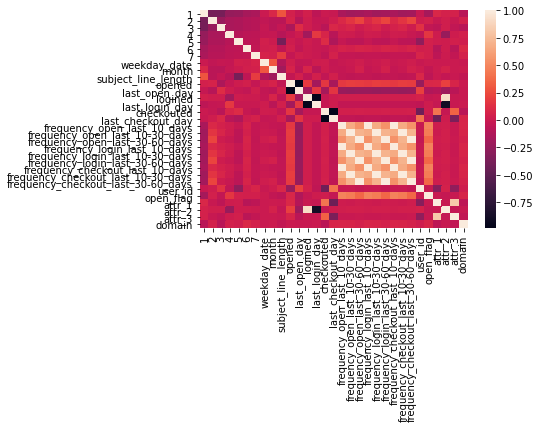

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

%matplotlib inline
corr = data_new.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## eigenvalues and principal component analysis

In [ ]:
# try https://etav.github.io/python/scikit_pca.html

x = data_new_no_id.values # convert the data into a numpy array
x = scale(x);x

array([[ -0.79372428,  -0.48221534,  -0.48159408, ...,   0.07735449,
          0.89074212,  -0.32397683],
       [ -0.79372428,  -0.48221534,  -0.48159408, ...,   0.07735449,
          0.89074212,   0.54295177],
       [ -0.79372428,  -0.48221534,  -0.48159408, ...,   0.07735449,
         -1.04116724,   1.40988037],
       ...,
       [ -0.79372428,   2.07376231,  -0.48159408, ..., -14.91229383,
         -1.04116724,  -0.32397683],
       [ -0.79372428,   2.07376231,  -0.48159408, ...,   0.07735449,
         -0.07521256,  -0.32397683],
       [ -0.79372428,  -0.48221534,  -0.48159408, ...,   0.07735449,
         -1.04116724,  -0.32397683]])

In [ ]:
len(data_new_no_id.columns)

30

In [ ]:
# thus we have 30 components to check

covar_matrix = PCA(n_components = 30)

In [ ]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

# thus, we only need first 22 features

array([ 24.9,  35.3,  44.7,  50.4,  56.1,  61.1,  65.7,  69.8,  73.7,
        77.4,  80.9,  84.4,  87.6,  90.5,  93. ,  95.3,  97.3,  98.9,
        99.5,  99.9, 100. , 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1, 100.1])

In [ ]:
print(x)

[[ -0.79372428  -0.48221534  -0.48159408 ...   0.07735449   0.89074212
   -0.32397683]
 [ -0.79372428  -0.48221534  -0.48159408 ...   0.07735449   0.89074212
    0.54295177]
 [ -0.79372428  -0.48221534  -0.48159408 ...   0.07735449  -1.04116724
    1.40988037]
 ...
 [ -0.79372428   2.07376231  -0.48159408 ... -14.91229383  -1.04116724
   -0.32397683]
 [ -0.79372428   2.07376231  -0.48159408 ...   0.07735449  -0.07521256
   -0.32397683]
 [ -0.79372428  -0.48221534  -0.48159408 ...   0.07735449  -1.04116724
   -0.32397683]]


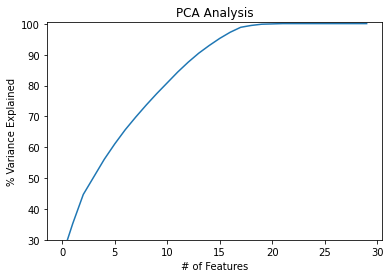

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [ ]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
# https://shankarmsy.github.io/posts/pca-sklearn.html

features_df = pd.DataFrame(covar_matrix.components_, columns = data_new_no_id.columns)

features_df.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,open_flag,attr_1,attr_2,attr_3,domain
0,-0.09,0.08,0.02,0.01,-0.02,0.03,-0.01,0.00,0.00,-0.03,0.11,-0.13,0.03,-0.03,0.03,-0.03,0.31,0.33,0.31,0.31,0.33,0.31,0.31,0.33,0.31,0.20,0.01,0.03,0.01,0.03
1,-0.11,-0.00,0.05,0.15,-0.05,0.01,0.02,-0.02,-0.08,0.03,-0.27,0.26,-0.49,0.49,-0.15,0.15,0.04,0.04,0.02,0.04,0.04,0.02,0.04,0.04,0.02,0.07,-0.14,-0.48,-0.12,0.04
2,0.04,-0.03,-0.11,0.12,0.08,-0.06,-0.06,0.03,0.01,-0.03,0.11,-0.11,-0.22,0.20,0.47,-0.47,-0.01,-0.02,-0.01,-0.01,-0.02,-0.01,-0.01,-0.02,-0.01,0.01,0.42,-0.22,0.40,-0.06
3,-0.52,0.07,0.18,0.12,0.46,0.07,-0.08,0.11,0.09,-0.56,-0.19,0.18,0.09,-0.08,0.09,-0.10,0.00,-0.02,-0.04,0.00,-0.02,-0.04,0.00,-0.02,-0.04,0.08,-0.04,0.07,-0.02,0.08
4,-0.02,0.08,-0.31,0.09,0.15,0.15,0.00,0.21,0.23,-0.21,0.49,-0.48,-0.15,0.16,-0.07,0.08,-0.08,-0.05,0.01,-0.08,-0.05,0.01,-0.08,-0.05,0.01,-0.00,-0.23,-0.14,-0.23,0.11


## initial copy and paste

https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/ ended up using this

In [ ]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# separate the independent and target variable 
train_X = data_new_no_id.drop(columns=['open_flag'])
train_Y = data_new_no_id['open_flag']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((55154, 29), (18385, 29), (55154,), (18385,))

In [ ]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  0.30293527952645016
RMSE on test data:  0.30100561592325636


In [ ]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  0.267643436020864
RMSE on test data:  0.2920819858341773


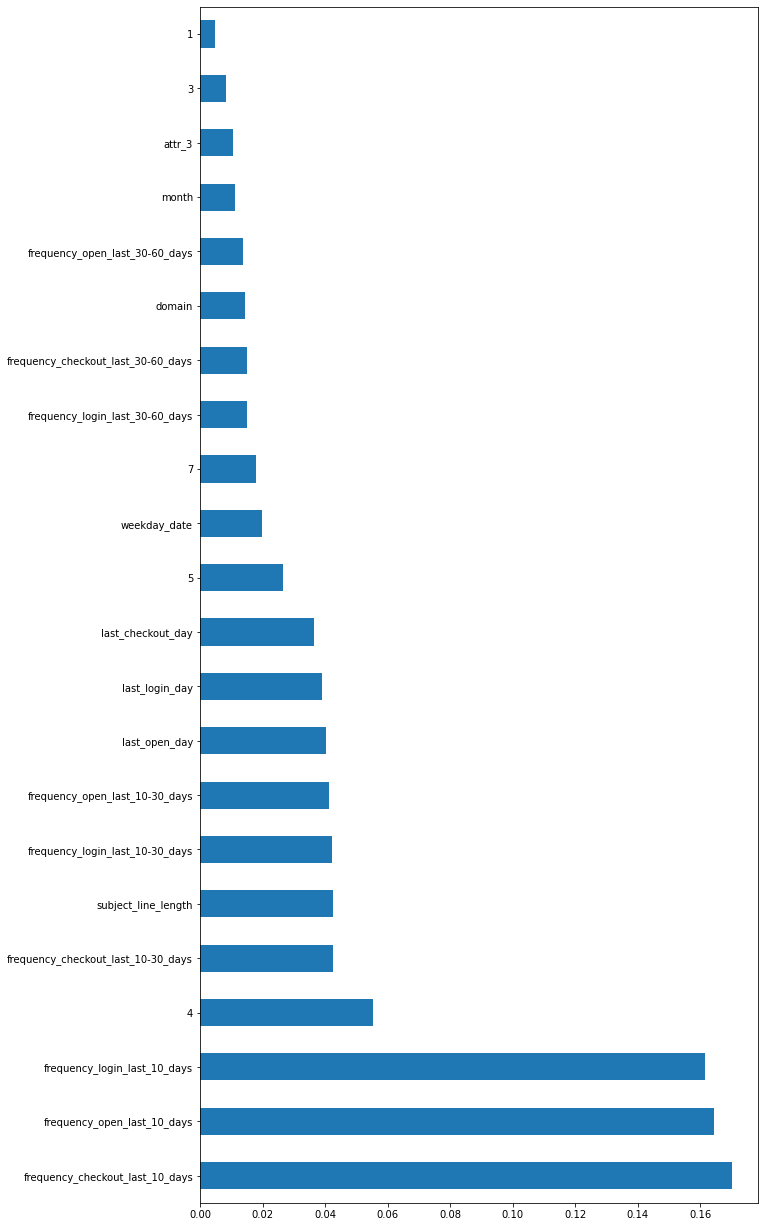

In [ ]:
# plot the 22 most important features 
plt.figure(figsize=(10,22))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(22).plot(kind='barh');

In [ ]:
print(feat_importances.sort_values(ascending = False))

frequency_checkout_last_10_days      0.17
frequency_open_last_10_days          0.16
frequency_login_last_10_days         0.16
4                                    0.06
frequency_checkout_last_10-30_days   0.04
subject_line_length                  0.04
frequency_login_last_10-30_days      0.04
frequency_open_last_10-30_days       0.04
last_open_day                        0.04
last_login_day                       0.04
last_checkout_day                    0.04
5                                    0.03
weekday_date                         0.02
7                                    0.02
frequency_login_last_30-60_days      0.02
frequency_checkout_last_30-60_days   0.01
domain                               0.01
frequency_open_last_30-60_days       0.01
month                                0.01
attr_3                               0.01
3                                    0.01
1                                    0.00
attr_1                               0.00
6                                 

In [ ]:
# columns to drop
all_features = pd.DataFrame({'feature':feat_importances.index,
                             'value':feat_importances.values}).sort_values(by = 'value',
                                                                           ascending = False).reset_index(drop = True)

features_to_drop = all_features.tail(8)['feature'].values.tolist()

features_to_drop.remove('attr_1')
features_to_drop.remove('attr_2')

print(features_to_drop)

[1, 6, 2, 'checkouted', 'opened', 'logined']


## redo data processing on test data

In [ ]:
#create a new data frame for feature engineering 

#Apply one-hot encoding for the country code column
df1 = df_test[['country_code']].copy()
encoded_columns = pd.get_dummies(df1['country_code'])
df1 = df1.join(encoded_columns).drop('country_code', axis=1)

#Extract info on the weekday date and month that the grass date is on
df1['weekday_date'] = pd.to_datetime(df_test.grass_date).dt.day_name()
df1['month'] = pd.to_datetime(df_test.grass_date).dt.month

#Include the subject line length
df1['subject_line_length']=df_test['subject_line_length'].copy()

# To convert the last open day into integer type and for last open day, it is set as 0
df1['opened'] = df_test.last_open_day.fillna('NA').apply(lambda x: 0 if x =='Never open' else 1)
df1['last_open_day'] = df_test.last_open_day.apply(lambda x: 1000 if x =='Never open' else x)
df1['last_open_day']=df1['last_open_day'].astype(str).astype(int)

# To convert the last login day into integer type 
df1['logined'] = df_test.last_login_day.fillna('NA').apply(lambda x: 0 if x =='Never login' else 1)
df1['last_login_day'] = df_test.last_login_day.apply(lambda x: 20000 if x =='Never login' else x)
df1['last_login_day'] = df1['last_login_day'].astype(str).astype(int)

# To convert the last checkout day into integer type 
df1['checkouted'] = df_test.last_checkout_day.fillna('NA').apply(lambda x: 0 if x =='Never checkout' else 1)
df1['last_checkout_day'] = df_test.last_checkout_day.apply(lambda x: 1500 if x =='Never checkout' else x)
df1['last_checkout_day'] = df1['last_checkout_day'].astype(str).astype(int)

#remove noise in open count last 10/30/60 days

#set those that are last open more than 10 days ago as 0 under open_count_last_10_days
df1['open_count_last_10_days'] = df_test['open_count_last_10_days'].copy()
df1['open_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 10) else x['open_count_last_10_days'],axis =1)

df1['open_count_last_30_days'] = df_test['open_count_last_30_days'].copy()
df1['open_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 30) else x['open_count_last_30_days'],axis =1)
df1['open_count_last_60_days'] = df_test['open_count_last_60_days'].copy()
df1['open_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 60) else x['open_count_last_60_days'],axis =1)

df1['open_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 10) & (x['open_count_last_10_days']==0)) else x['open_count_last_10_days'],axis=1)
df1['open_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 30) & (x['open_count_last_30_days']==0)) else x['open_count_last_30_days'],axis =1)
df1['open_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 60) & (x['open_count_last_60_days']==0)) else x['open_count_last_60_days'],axis =1)

#remove noise in open login last 10/30/60 days

#set those that are last login more than 10 days ago as 0 under open_count_last_10_days
df1['login_count_last_10_days'] = df_test['login_count_last_10_days'].copy()
df1['login_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 10) else x['login_count_last_10_days'],axis =1)
df1['login_count_last_30_days'] = df_test['login_count_last_30_days'].copy()
df1['login_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 30) else x['login_count_last_30_days'],axis =1)
df1['login_count_last_60_days'] = df_test['login_count_last_60_days'].copy()
df1['login_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 60) else x['login_count_last_60_days'],axis =1)

df1['login_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 10) & (x['login_count_last_10_days']==0)) else x['login_count_last_10_days'],axis=1)
df1['login_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 30) & (x['login_count_last_30_days']==0)) else x['login_count_last_30_days'],axis =1)
df1['login_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 60) & (x['login_count_last_60_days']==0)) else x['login_count_last_60_days'],axis =1)

df1['checkout_count_last_10_days'] = df_test['checkout_count_last_10_days'].copy()
df1['checkout_count_last_30_days'] = df_test['checkout_count_last_30_days'].copy()
df1['checkout_count_last_60_days'] = df_test['checkout_count_last_60_days'].copy()

# remove noise in open checkout last 10/30/60 days

# set those that are last checkout more than 10 days ago as 0 under open_count_last_10_days
df1['checkout_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 10) else x['checkout_count_last_10_days'],axis =1)
df1['checkout_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 30) else x['checkout_count_last_30_days'],axis =1)
df1['checkout_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 60) else x['checkout_count_last_60_days'],axis =1)

df1['checkout_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 10) & (x['checkout_count_last_10_days']==0)) else x['checkout_count_last_10_days'],axis=1)
df1['checkout_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 30) & (x['checkout_count_last_30_days']==0)) else x['checkout_count_last_30_days'],axis =1)
df1['checkout_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 60) & (x['checkout_count_last_60_days']==0)) else x['checkout_count_last_60_days'],axis =1)

#convert last open/checkout/login day into frequency
df1['frequency_open_last_10_days']=df1['open_count_last_10_days']/10
df1['frequency_open_last_30_days']=df1['open_count_last_30_days']/30
df1['frequency_open_last_60_days']=df1['open_count_last_60_days']/60
df1['frequency_login_last_10_days']=df1['open_count_last_10_days']/10
df1['frequency_login_last_30_days']=df1['open_count_last_30_days']/30
df1['frequency_login_last_60_days']=df1['open_count_last_60_days']/60
df1['frequency_checkout_last_10_days']=df1['open_count_last_10_days']/10
df1['frequency_checkout_last_30_days']=df1['open_count_last_30_days']/30
df1['frequency_checkout_last_60_days']=df1['open_count_last_60_days']/60

df1

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,frequency_open_last_10_days,frequency_open_last_30_days,frequency_open_last_60_days,frequency_login_last_10_days,frequency_login_last_30_days,frequency_login_last_60_days,frequency_checkout_last_10_days,frequency_checkout_last_30_days,frequency_checkout_last_60_days
0,0,0,0,0,0,1,0,Tuesday,9,35,1,27,1,2,1,13,0,2,4,12,43,99,0,5,10,0.00,0.07,0.07,0.00,0.07,0.07,0.00,0.07,0.07
1,0,0,0,0,0,1,0,Tuesday,9,35,1,7,1,5,1,383,2,9,17,18,48,90,1,1,4,0.20,0.30,0.28,0.20,0.30,0.28,0.20,0.30,0.28
2,0,0,0,0,1,0,0,Tuesday,9,25,1,34,1,1,1,3,0,4,12,24,69,119,5,19,27,0.00,0.13,0.20,0.00,0.13,0.20,0.00,0.13,0.20
3,1,0,0,0,0,0,0,Tuesday,9,36,1,63,1,5,1,5,0,0,1,9,23,69,0,0,6,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.02
4,0,0,0,0,1,0,0,Tuesday,9,23,1,6,1,5,1,54,0,0,0,2,5,5,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0,0,0,0,0,1,0,Sunday,9,53,0,1000,1,4,1,8,4,11,21,27,80,124,3,8,13,0.40,0.37,0.35,0.40,0.37,0.35,0.40,0.37,0.35
55966,0,0,0,0,0,1,0,Sunday,9,53,1,59,1,802,1,1207,0,0,1,0,0,7,0,0,0,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.02
55967,0,0,0,0,0,1,0,Sunday,9,43,0,1000,1,7,0,1500,0,3,3,1,4,15,0,0,0,0.00,0.10,0.05,0.00,0.10,0.05,0.00,0.10,0.05
55968,0,0,0,0,0,1,0,Sunday,9,43,1,5,1,5,1,6,2,2,6,0,0,3,0,0,0,0.20,0.07,0.10,0.20,0.07,0.10,0.20,0.07,0.10


In [ ]:
df1.replace({'weekday_date': dict_weekday_date},
            inplace = True)

df1.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,opened,last_open_day,logined,last_login_day,checkouted,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,frequency_open_last_10_days,frequency_open_last_30_days,frequency_open_last_60_days,frequency_login_last_10_days,frequency_login_last_30_days,frequency_login_last_60_days,frequency_checkout_last_10_days,frequency_checkout_last_30_days,frequency_checkout_last_60_days
0,0,0,0,0,0,1,0,0,9,35,1,27,1,2,1,13,0,2,4,12,43,99,0,5,10,0.00,0.07,0.07,0.00,0.07,0.07,0.00,0.07,0.07
1,0,0,0,0,0,1,0,0,9,35,1,7,1,5,1,383,2,9,17,18,48,90,1,1,4,0.20,0.30,0.28,0.20,0.30,0.28,0.20,0.30,0.28
2,0,0,0,0,1,0,0,0,9,25,1,34,1,1,1,3,0,4,12,24,69,119,5,19,27,0.00,0.13,0.20,0.00,0.13,0.20,0.00,0.13,0.20
3,1,0,0,0,0,0,0,0,9,36,1,63,1,5,1,5,0,0,1,9,23,69,0,0,6,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.02
4,0,0,0,0,1,0,0,0,9,23,1,6,1,5,1,54,0,0,0,2,5,5,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
df1.drop(columns = features_to_drop, inplace = True)

In [ ]:
df1.drop(columns = ['open_count_last_10_days', 'open_count_last_30_days', 'open_count_last_60_days',
               'login_count_last_10_days', 'login_count_last_30_days', 'login_count_last_60_days',
               'checkout_count_last_10_days', 'checkout_count_last_30_days', 'checkout_count_last_60_days'],
         inplace = True)

In [ ]:
df1

,3,4,5,7,weekday_date,month,subject_line_length,last_open_day,last_login_day,last_checkout_day,frequency_open_last_10_days,frequency_open_last_30_days,frequency_open_last_60_days,frequency_login_last_10_days,frequency_login_last_30_days,frequency_login_last_60_days,frequency_checkout_last_10_days,frequency_checkout_last_30_days,frequency_checkout_last_60_days
0,0,0,0,0,0,9,35,27,2,13,0.00,0.07,0.07,0.00,0.07,0.07,0.00,0.07,0.07
1,0,0,0,0,0,9,35,7,5,383,0.20,0.30,0.28,0.20,0.30,0.28,0.20,0.30,0.28
2,0,0,1,0,0,9,25,34,1,3,0.00,0.13,0.20,0.00,0.13,0.20,0.00,0.13,0.20
3,0,0,0,0,0,9,36,63,5,5,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.02
4,0,0,1,0,0,9,23,6,5,54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0,0,0,0,5,9,53,1000,4,8,0.40,0.37,0.35,0.40,0.37,0.35,0.40,0.37,0.35
55966,0,0,0,0,5,9,53,59,802,1207,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.02
55967,0,0,0,0,5,9,43,1000,7,1500,0.00,0.10,0.05,0.00,0.10,0.05,0.00,0.10,0.05
55968,0,0,0,0,5,9,43,5,5,6,0.20,0.07,0.10,0.20,0.07,0.10,0.20,0.07,0.10


In [ ]:
data_new_no_id.drop(columns = ['attr_1','attr_2','attr_3','domain'], inplace = True)

In [ ]:
data_new_no_id.drop(columns = features_to_drop, inplace = True)

In [ ]:
data_new_no_id

,3,4,5,7,weekday_date,month,subject_line_length,last_open_day,last_login_day,last_checkout_day,frequency_open_last_10_days,frequency_open_last_10-30_days,frequency_open_last_30-60_days,frequency_login_last_10_days,frequency_login_last_10-30_days,frequency_login_last_30-60_days,frequency_checkout_last_10_days,frequency_checkout_last_10-30_days,frequency_checkout_last_30-60_days,open_flag
0,0,1,0,0,0,7,44,19,6,18,0.00,0.10,0.07,0.00,0.10,0.07,0.00,0.10,0.07,0
1,0,1,0,0,0,7,44,9,4,8,0.20,0.35,0.27,0.20,0.35,0.27,0.20,0.35,0.27,1
2,0,0,0,0,0,7,49,14,5,5,0.00,0.20,0.27,0.00,0.20,0.27,0.00,0.20,0.27,0
3,0,0,0,0,0,7,49,49,9,53,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03,0
4,0,0,0,0,0,7,49,227,6,221,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,0,0,0,0,6,9,39,24,36,279,0.00,0.05,0.00,0.00,0.05,0.00,0.00,0.05,0.00,0
73535,0,0,0,0,6,9,38,46,10,51,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.03,0
73536,0,0,0,0,6,9,32,1000,20000,1500,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
73537,0,0,0,0,6,9,38,5,34,1500,0.20,0.10,0.00,0.20,0.10,0.00,0.20,0.10,0.00,1


## finally predict stuff

jieru if you want, can try doing on the original dataset

In [ ]:
# do again, with the correct data this time and no data processing, skip the date and remove the 'never's
# separate the independent and target variable
# you can play with the columns that were dropped vs not. # == included as feature in prediction

#Extract info on the weekday date and month that the grass date is on
df_train['weekday_date'] = pd.to_datetime(df_train.grass_date).dt.day_name()
encoded_columns = pd.get_dummies(df_train['weekday_date'])
df_train = df_train.join(encoded_columns).drop('weekday_date', axis=1)

ValueError: ignored

In [ ]:
to_drop = ['open_flag', 'grass_date', 'user_id', 'row_id',
                                 # 'last_checkout_day',
                                 'login_count_last_60_days',
                                 'login_count_last_30_days', 'login_count_last_10_days',
                                 'checkout_count_last_60_days', 'checkout_count_last_30_days',
                                 'checkout_count_last_10_days'
                                 ]

to_keep = ['country_code',
           'open_count_last_10_days',
           'open_count_last_30_days',
           'open_count_last_60_days',
           ]

train_x = pd.DataFrame()
test_x = pd.DataFrame()

# train_x = df_train.drop(columns = to_drop)

for j in to_keep:
  train_x[j] = df_train[j]
  test_x[j] = df_test[j]

train_x.replace(to_replace =["Never open", 'Never login', 'Never checkout'], 
                 value = -1,
                inplace = True)

train_y = df_train['open_flag']

# test_x = df_test.drop(columns= to_drop[1:])

test_x.replace(to_replace =["Never open", 'Never login', 'Never checkout'], 
                 value = -1,
                inplace = True)

In [ ]:
test_x.head()

,country_code,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,6,2,3,4
1,6,1,1,1
2,5,0,0,0
3,1,0,0,0
4,5,0,0,0


In [ ]:
train_y.head()

0    0
1    1
2    0
3    0
4    0
Name: open_flag, dtype: int64

The modified dataset

In [ ]:
# cleaned dataset
# separate the independent and target variable 
train_x = data_new_no_id.drop(columns='open_flag')
train_y = data_new_no_id['open_flag']

test_x = df1

Actually training model

In [ ]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

print(predict_test)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
# print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

NameError: ignored

In [ ]:
# try with another model on kaggle
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(train_x,train_y)
predictions = clf.predict(test_x)

print(predictions)

[0 0 0 ... 0 0 1]


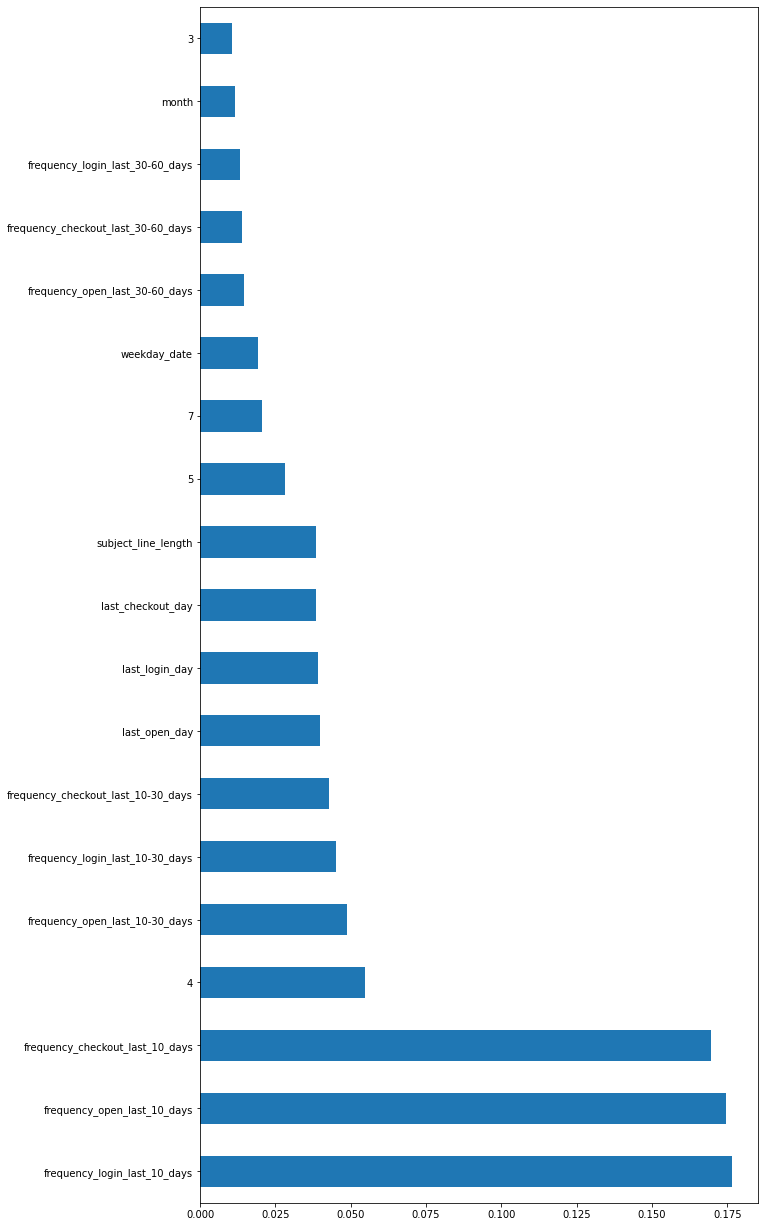

In [ ]:
plt.figure(figsize=(10,22))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(22).plot(kind='barh');

In [ ]:
# briefly do a scree plot
# seems to be overfitted most likely

print(feat_importances.sort_values(ascending = False).cumsum())

frequency_login_last_10_days         0.18
frequency_open_last_10_days          0.35
frequency_checkout_last_10_days      0.52
4                                    0.58
frequency_open_last_10-30_days       0.62
frequency_login_last_10-30_days      0.67
frequency_checkout_last_10-30_days   0.71
last_open_day                        0.75
last_login_day                       0.79
last_checkout_day                    0.83
subject_line_length                  0.87
5                                    0.90
7                                    0.92
weekday_date                         0.94
frequency_open_last_30-60_days       0.95
frequency_checkout_last_30-60_days   0.96
frequency_login_last_30-60_days      0.98
month                                0.99
3                                    1.00
dtype: float64


## formatting for submission

In [ ]:
from google.colab import files

columns_titles = ["row_id","open_flag"]

In [ ]:
# new kaggle attempt

predictions_df = pd.DataFrame(predictions)
predictions_df['row_id'] = predictions_df.index
predictions_df.rename(columns = {0: 'open_flag'}, inplace = True)
predictions_df=predictions_df.reindex(columns=columns_titles)
print(predictions_df)

filename = 'submissinjyog_small.csv'
predictions_df.to_csv(filename, index=False)
files.download(filename)

       row_id  open_flag
0           0          0
1           1          0
2           2          0
3           3          0
4           4          0
...       ...        ...
55965   55965          0
55966   55966          0
55967   55967          0
55968   55968          0
55969   55969          1

[55970 rows x 2 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## original try
The one above I stole off kaggle

In [ ]:
predict_test_df = pd.DataFrame(predict_test)

In [ ]:
predict_test_df['row_id'] = predict_test_df.index
predict_test_df.rename(columns = {0: 'open_flag'}, inplace = True)
print(predict_test_df)

       open_flag  row_id
0           0.04       0
1           0.28       1
2           0.32       2
3           0.02       3
4           0.18       4
...          ...     ...
55965       0.50   55965
55966       0.02   55966
55967       0.05   55967
55968       0.13   55968
55969       0.12   55969

[55970 rows x 2 columns]


In [ ]:
predict_test_df=predict_test_df.reindex(columns=columns_titles)

print(predict_test_df)

       row_id  open_flag
0           0       0.04
1           1       0.28
2           2       0.32
3           3       0.02
4           4       0.18
...       ...        ...
55965   55965       0.50
55966   55966       0.02
55967   55967       0.05
55968   55968       0.13
55969   55969       0.12

[55970 rows x 2 columns]


In [ ]:
predict_test_df['open_flag'] = predict_test_df['open_flag'].round(decimals = 0).astype(int)

predict_test_df

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,1
55966,55966,0
55967,55967,0
55968,55968,0


## Submission

In [ ]:
filename = 'submissinjyog1.csv'
predict_test_df.to_csv(filename, index=False)
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>